<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Введение" data-toc-modified-id="Введение-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Введение</a></span></li><li><span><a href="#План-проекта" data-toc-modified-id="План-проекта-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>План проекта</a></span></li><li><span><a href="#Используемые-библиотеки" data-toc-modified-id="Используемые-библиотеки-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Используемые библиотеки</a></span></li><li><span><a href="#Загрузка-данных-и-первый-взяглд-на-них" data-toc-modified-id="Загрузка-данных-и-первый-взяглд-на-них-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Загрузка данных и первый взяглд на них</a></span></li><li><span><a href="#Анализ-и-подготовка-данных" data-toc-modified-id="Анализ-и-подготовка-данных-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Анализ и подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Анализ-временного-ряда" data-toc-modified-id="Анализ-временного-ряда-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Анализ временного ряда</a></span></li><li><span><a href="#Подготовка-данных-для-обучения" data-toc-modified-id="Подготовка-данных-для-обучения-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Подготовка данных для обучения</a></span></li></ul></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Обучение моделей</a></span><ul class="toc-item"><li><span><a href="#Эконометрический-подход:-модель-SARIMA" data-toc-modified-id="Эконометрический-подход:-модель-SARIMA-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Эконометрический подход: модель SARIMA</a></span></li><li><span><a href="#Гребнеевая-регрессия" data-toc-modified-id="Гребнеевая-регрессия-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Гребнеевая регрессия</a></span></li><li><span><a href="#Градиентный-бустинг-LightGBM" data-toc-modified-id="Градиентный-бустинг-LightGBM-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Градиентный бустинг LightGBM</a></span></li></ul></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Тестирование</a></span><ul class="toc-item"><li><span><a href="#SARIMA" data-toc-modified-id="SARIMA-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>SARIMA</a></span></li><li><span><a href="#Гребнеевая-регрессия" data-toc-modified-id="Гребнеевая-регрессия-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Гребнеевая регрессия</a></span></li><li><span><a href="#Градиентный-бустинг-LightGBM" data-toc-modified-id="Градиентный-бустинг-LightGBM-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Градиентный бустинг LightGBM</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

#  Прогнозирование заказов такси

## Введение

Цель данного проекта - разработка модели для прогноза количества заказов такси на следующий час, чтобы привлекать больше водителей в период пиковой нагрузки. Датасет представляет собой исторические данные о заказах такси в аэропортах. Целевая метрика качества - *RMSE*. Порог метрики качества для решения задачи - не больше 48 заказов такси.

Данные лежат в файле `taxi.csv`. Количество заказов находится в столбце `num_orders`.

## План проекта

1. Загрузим данные и произведем первый взгляд на них.

2. Проанализируем и подготовим данные.

3. Обучим модели с различными гиперпараметрами (при обучении моделей машинного обучения будем использовать 5-ти кратную кросс-валидацию на скользящем окне). 

В проекте реализованы:

- Модель SARIMA;

- Гребнеевая регрессия;

- LightGBM.

4. Проверим данные на тестовой выборке и сделаем выводы. Размер тестовой выборки - 10% от исходных данных. 

## Используемые библиотеки

В настоящем проекте используются следующие библиотеки:

- `pandas`;
- `numpy`;
- `matplotlib`;
- `statsmodels`;
- `IPython`;
- `itertools`;
- `warnings`;
- `sklearn`;
- `lightgbm`.

## Загрузка данных и первый взяглд на них

Установка бибилиотек:

Загрузим необходимые библиотеки:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from IPython.display import Image
from sklearn.model_selection import train_test_split
from itertools import product
import warnings
warnings.filterwarnings('ignore')
import statsmodels.tsa.api as smt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import GridSearchCV
import lightgbm as lgb

Загрузим данные:

In [2]:
df = pd.read_csv(r'C:\Users\Wunderwaffe\Downloads\taxi.csv', parse_dates=[0])

Выведем первые 5 строк датафрейма:

In [3]:
df.head()

,datetime,num_orders
0,2018-03-01 00:00:00,9
1,2018-03-01 00:10:00,14
2,2018-03-01 00:20:00,28
3,2018-03-01 00:30:00,20
4,2018-03-01 00:40:00,32


Индексирование числа заказов происходит в интервале 10 минут.

Выведем основную информацию о датафрейме:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26496 entries, 0 to 26495
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    26496 non-null  datetime64[ns]
 1   num_orders  26496 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 414.1 KB


Пропусков данных нет, число заказов имеет целочисленный тип.

Проверим наличие дубликатов в датафрейме:

In [5]:
df.duplicated().sum()

0

Дубликатов не обнаружено. Установим дату и время в качестве индекса:

In [6]:
df = df.set_index('datetime')

Проверим хронологический порядок дат в датафрейме:

In [7]:
df.index.is_monotonic

True

Даты находятся в хронологическом порядке, данные не нуждаются в предобработке. Перейдем к анализу данных в следующим разделе.

## Анализ и подготовка данных

### Анализ временного ряда

Построим график зависимости числа заказов от времени (временной ряд):

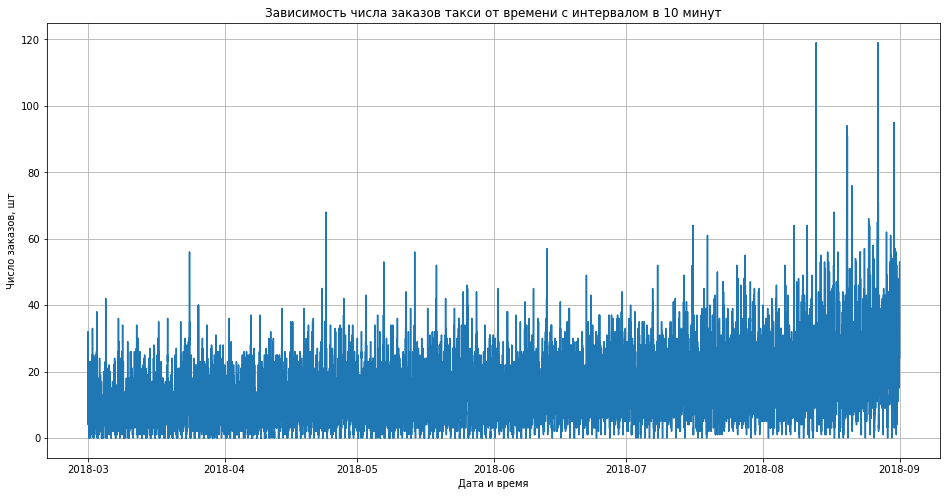

In [8]:
plt.figure(figsize=(16,8))
plt.plot(df.index, 
         df, 
         label='Число заказов')
plt.grid()
plt.title('Зависимость числа заказов такси от времени с интервалом в 10 минут')
plt.xlabel('Дата и время')
plt.ylabel('Число заказов, шт');

Из графика видно, что временной ряд имеет выбросы, преимущественно в августе. Кроме того анализировать число заказов такси за каждые 10 минут не совсем корректно, так как в течении дня имеются часы со значительно большим числом заказов и анализ 10 минутного таймфрейма будет не информативен.
Проведем ресемплирование временного ряда по одному часу с агрегированием суммы числа заказов за час:

In [9]:
df = df.resample('1H').sum()

Посчитаем скользящее среднее числа заказов с окном в одну неделю (168 часов):

In [10]:
rolling_mean_p168 = df['num_orders'].rolling(168).mean()

Построим временной ряд и его скользящее среднее:

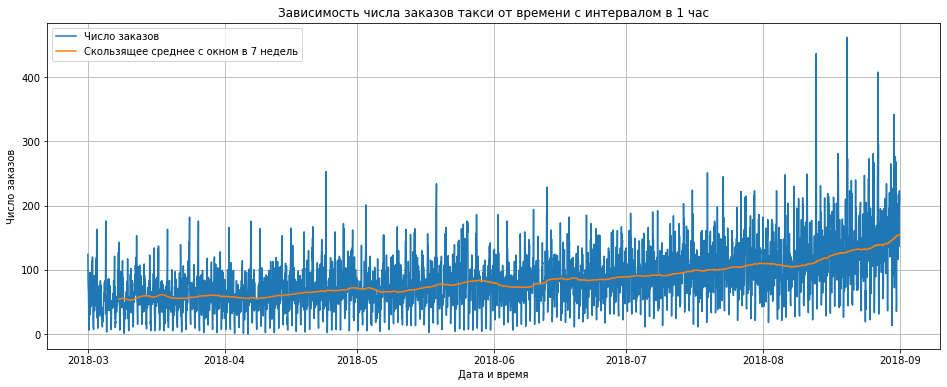

In [11]:
plt.figure(figsize=(16,6))
plt.plot(df.index, 
         df['num_orders'], 
         label='Число заказов')
plt.plot(df.index,
         rolling_mean_p168, 
         label='Скользящее среднее с окном в 7 недель')
plt.grid()
plt.title('Зависимость числа заказов такси от времени с интервалом в 1 час')
plt.xlabel('Дата и время')
plt.ylabel('Число заказов')
plt.legend();

Данный временной ряд является нестационарным, так как его математическое ожидание меняется во времени - данные имеют четко выраженный тренд (скорее всего это сезонность, но так как мы имеем данные всего за полгода и горизонт прогноза небольшой - можно считать это трендом). Причем тренд нелинейный, напоминает экспоненциальный. Для визуальной оценки сезонности временного ряда, построим его на интервале одного месяца:

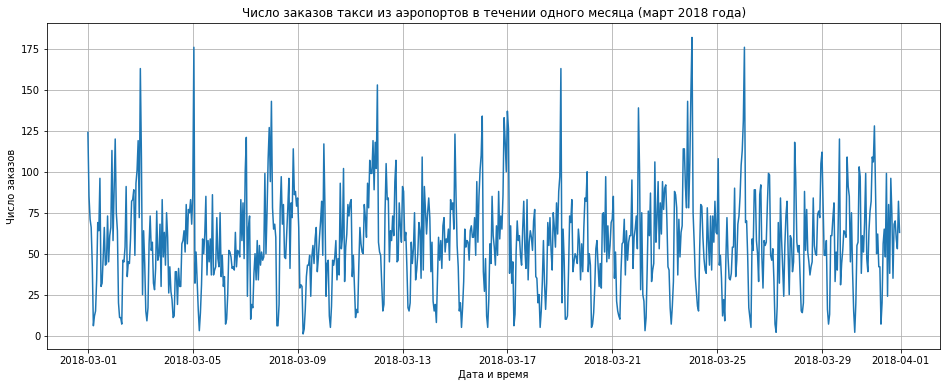

In [12]:
plt.figure(figsize=(16,6))
plt.plot(df['2018-03-01':'2018-03-31'].index, 
         df['2018-03-01':'2018-03-31'], 
         label='Число заказов')
plt.grid()
plt.title('Число заказов такси из аэропортов в течении одного месяца (март 2018 года)')
plt.xlabel('Дата и время')
plt.ylabel('Число заказов');

Сократим интервал до одной недели:

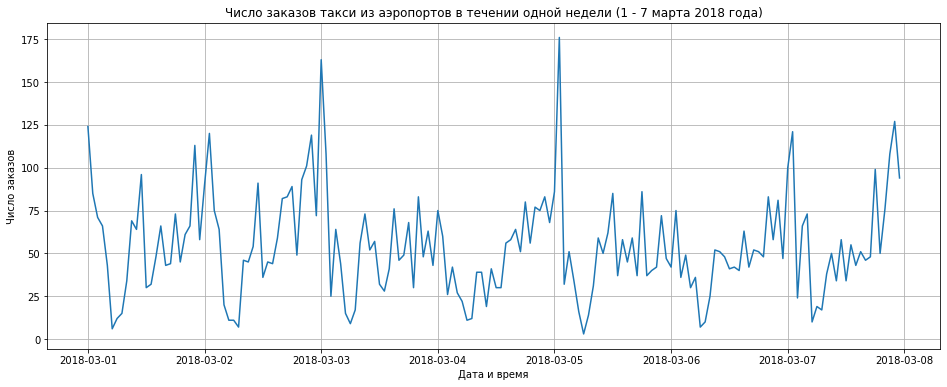

In [13]:
plt.figure(figsize=(16,6))
plt.plot(df['2018-03-01':'2018-03-07'].index, 
         df['2018-03-01':'2018-03-07'], 
         label='Число заказов')
plt.grid()
plt.title('Число заказов такси из аэропортов в течении одной недели (1 - 7 марта 2018 года)')
plt.xlabel('Дата и время')
plt.ylabel('Число заказов');

Четко выделяется дневная аддитивная сезонность. Возможн Убедимся в этом, с помощью функции `seasonal_decompose()` модуля `tsa.seasonal` библиотеки `statsmodels`, разложив временной ряд на тренд, сезонность и шум:

In [14]:
decomposed = sm.tsa.seasonal_decompose(df)

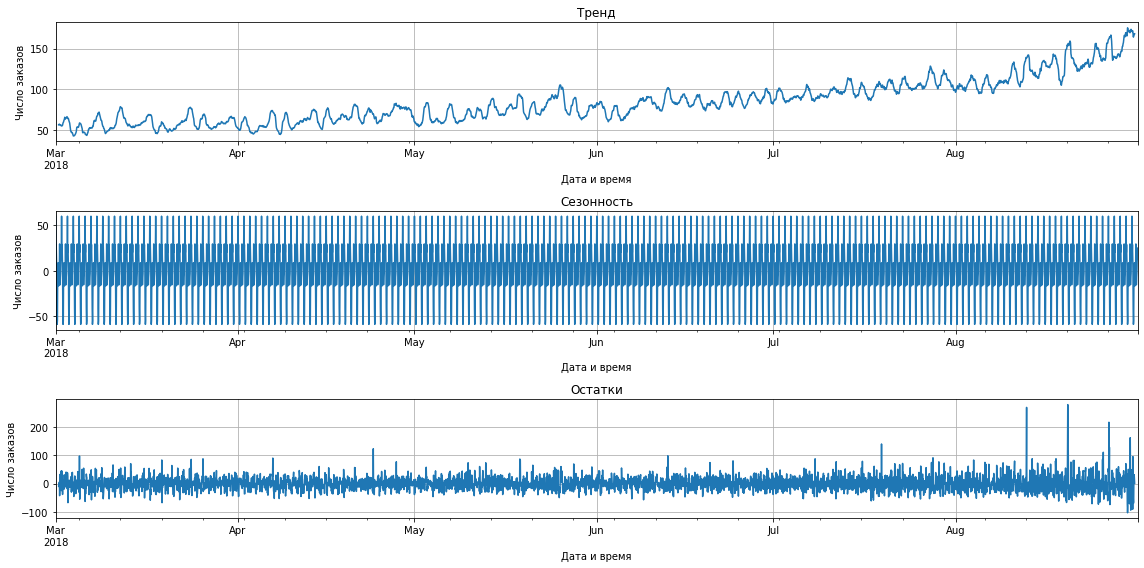

In [15]:
plt.figure(figsize=(16, 8))
plt.subplot(311)
decomposed.trend.plot(ax=plt.gca())
plt.title('Тренд')
plt.xlabel('Дата и время')
plt.ylabel('Число заказов')
plt.grid()
plt.subplot(312)
decomposed.seasonal.plot(ax=plt.gca())
plt.title('Сезонность')
plt.xlabel('Дата и время')
plt.ylabel('Число заказов')
plt.grid()
plt.subplot(313)
decomposed.resid.plot(ax=plt.gca())
plt.title('Остатки')
plt.xlabel('Дата и время')
plt.ylabel('Число заказов')
plt.grid()
plt.tight_layout()

Уменьшим интервал сезонности до двух дней:

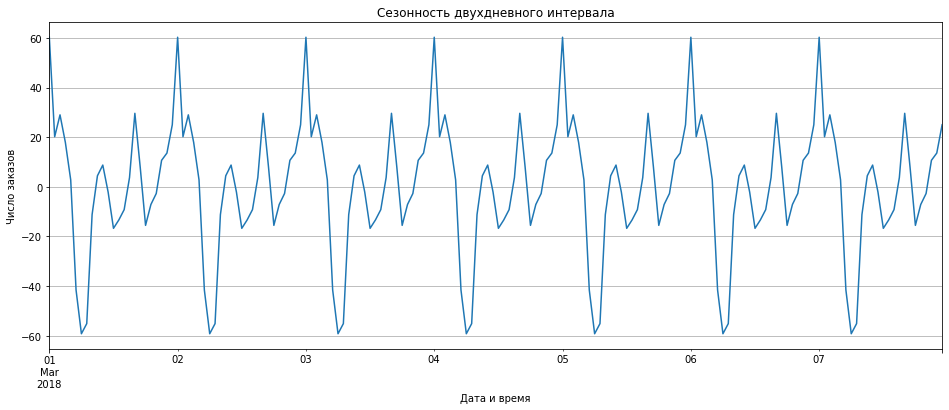

In [16]:
plt.figure(figsize=(16, 6))
decomposed.seasonal['2018-03-01':'2018-03-07'].plot()
plt.title('Сезонность двухдневного интервала')
plt.xlabel('Дата и время')
plt.ylabel('Число заказов')
plt.grid()

Действительно, временной ряд имеет нелинейный тренд и дневную сезонность. Возможно имеется также мультипликарная 6-ти часовая сезонность (т.е. ряд мультисезонный). Среди непрогнозируемых остатков (шума) наблюдаются характерные пики (те самые выбросы в августе).

Посмотрим основные статистические характеристики временного ряда:

In [17]:
df.describe()

,num_orders
count,4416.000000
mean,84.422781
std,45.023853
min,0.000000
25%,54.000000
50%,78.000000
75%,107.000000
max,462.000000


И посотроим распределение его значений: 

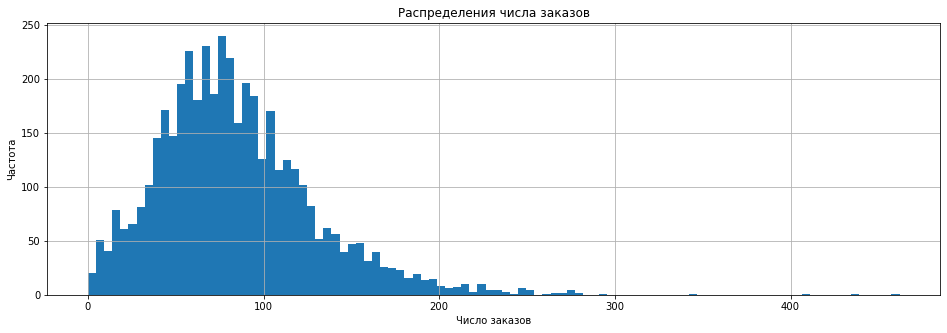

In [18]:
df.hist(figsize=(16,5), bins=100);
plt.title('Распределения числа заказов')
plt.xlabel('Число заказов')
plt.ylabel('Частота');

Распределение имеет положительную ассиметрию (левостороннняя) из-за наличия выбросов с большим числом заказов. Данные выбросы в основном приходятся на август, один из самых "отпускных" дней.

Убедимся в нестационарности временного ряда с помощью расширенного критерия Дики-Фуллера, установив уровень критической значимости в 5%:

In [19]:
test = sm.tsa.adfuller(df['num_orders'])
print('adf: ', test[0])
print('p-value: ', test[1])
print('Critical values: ', test[4])
if test[0] > test[4]['5%']: 
    print('Нет оснований отвергнуть H0: есть единичные корни, ряд не стационарен')
else:
    print('Отвегаем H0, принимается альтернативная гипотеза H1: единичных корней нет, ряд стационарен')

adf:  -3.0689242890279567
p-value:  0.02894005140261284
Critical values:  {'1%': -3.431842162413052, '5%': -2.8621993540813637, '10%': -2.567120978470452}
Отвегаем H0, принимается альтернативная гипотеза H1: единичных корней нет, ряд стационарен


Принимая во внимание установленный уровень критической значимости в 5%, можно считать временной ряд квазистационарным. Стоит отметить, что установив значения уровня критической значимости в 1% - мы бы не смогли отвергнуть нулевую гипотезу. 

Построим графики автокорреляции и частичной автокорреляции:

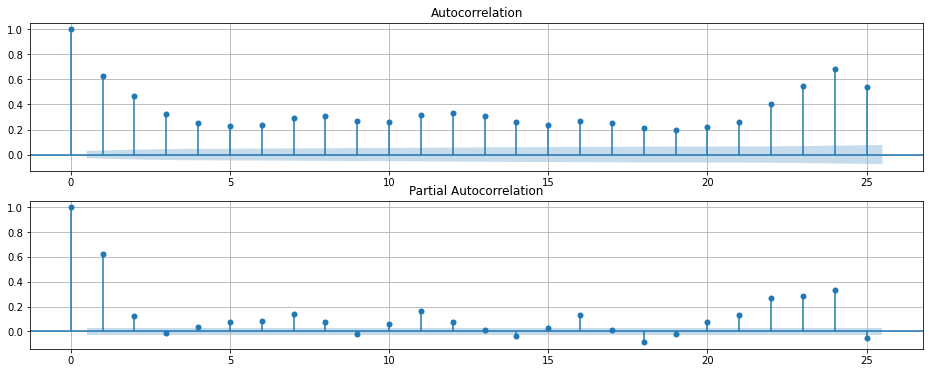

In [20]:
fig = plt.figure(figsize=(16,6))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df.values.squeeze(), lags=25, ax=ax1)
plt.grid()
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df, lags=25, ax=ax2)
plt.grid()

Автокорреляционная функция показывает большое число значимых лагов, что также говорит о сезонности временного ряда (дневная аддитивная и 6-ти часовая мультипликарная).

### Подготовка данных для обучения

Добавим признаки для моделей гребнеевой регрессии и градиентного бустинга LightGBM с помощью функции `make_features`. Из временного ряда выделим в качестве признаков:

1. День недели;

2. Час дня;

3. Категориальный признак: выходной день (если это выходной день - 1, если нет - 0);

4. Категориальный признак: праздничный день (если это праздничный день - 1, если нет - 0);

5. Лаги временного ряда;

6. Скользящее среднее временного ряда.

Для создания категориального признака с праздничными днями воспользуемся производственным календарем за 2018 год:

In [21]:
Image(url= "https://lutugino.su/uploads/posts/2017-12/1513318205_cpmyv7tqjpa.jpg", width=1000, height=1000)

Выведем границы интервала временного ряда:

In [22]:
df.index.min(), df.index.max()

(Timestamp('2018-03-01 00:00:00', freq='H'),
 Timestamp('2018-08-31 23:00:00', freq='H'))

Создадим список с индексами праздничных дней:

In [23]:
holidays = ['2018-03-08', '2018-03-09', '2018-04-09', 
            '2018-04-30', '2018-05-01', '2018-05-09',
            '2018-05-10', '2018-05-11', '2018-05-28']

И нерабочих суббота:

In [24]:
exceptions_of_weekend = ['2018-04-28', '2018-05-05']

Обратим внимание, что есть несколько исключений, а именно - суббота 28 апреля и суббота 5 мая были рабочими днями. Нужно учесть это при создании категориального признака с выходными днями.

In [25]:
def make_features(data, max_lag, rolling_mean_size): 
    
    data['dayofweek'] = data.index.dayofweek
    data['hour'] = data.index.hour
    data['is_holiday'] = np.array(pd.to_datetime({'year' : data.index.year,
                                                  'month' : data.index.month,
                                                  'day' : data.index.day}).isin(holidays) * 1)  
    data['is_weekend'] = data.index.dayofweek.isin([5,6]) * \
                         np.array(~pd.to_datetime({'year' : data.index.year,
                                                   'month' : data.index.month,
                                                   'day' : data.index.day}).isin(exceptions_of_weekend) * 1)  
    
    for lag in range(1, max_lag + 1):
        data['lag_' + str(lag)] = data['num_orders'].shift(lag)

    data['rolling_mean'] = data['num_orders'].shift(1).rolling(rolling_mean_size).mean()

Возьмем величину смещения лагов (параметр авторегрессии) равным шести часам, а окно для скользящего среднего равным 24 часам.

In [26]:
make_features(df, 6, 24)

Убедимся в создании признаков:

In [27]:
df.columns

Index(['num_orders', 'dayofweek', 'hour', 'is_holiday', 'is_weekend', 'lag_1',
       'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6', 'rolling_mean'],
      dtype='object')

Выборочно проверим корректное создание категориальных признаков:

In [28]:
df.loc['2018-04-28'].head(3)

,num_orders,dayofweek,hour,is_holiday,is_weekend,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,rolling_mean
datetime,,,,,,,,,,,,
2018-04-28 00:00:00,164,5,0,0,0,72.0,172.0,92.0,84.0,55.0,70.0,76.333333
2018-04-28 01:00:00,128,5,1,0,0,164.0,72.0,172.0,92.0,84.0,55.0,78.125000
2018-04-28 02:00:00,112,5,2,0,0,128.0,164.0,72.0,172.0,92.0,84.0,81.208333


Это суббота, однако день рабочий -  все верно.

In [29]:
df.loc['2018-04-21'].head(3)

,num_orders,dayofweek,hour,is_holiday,is_weekend,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,rolling_mean
datetime,,,,,,,,,,,,
2018-04-21 00:00:00,167,5,0,0,1,96.0,150.0,114.0,135.0,51.0,62.0,73.708333
2018-04-21 01:00:00,119,5,1,0,1,167.0,96.0,150.0,114.0,135.0,51.0,75.250000
2018-04-21 02:00:00,110,5,2,0,1,119.0,167.0,96.0,150.0,114.0,135.0,77.500000


А здесь суббота - выходной. Проверим праздничный день:

In [30]:
df.loc['2018-03-08'].head(3)

,num_orders,dayofweek,hour,is_holiday,is_weekend,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,rolling_mean
datetime,,,,,,,,,,,,
2018-03-08 00:00:00,143,3,0,1,0,94.0,127.0,108.0,76.0,50.0,99.0,60.041667
2018-03-08 01:00:00,78,3,1,1,0,143.0,94.0,127.0,108.0,76.0,50.0,61.833333
2018-03-08 02:00:00,65,3,2,1,0,78.0,143.0,94.0,127.0,108.0,76.0,60.041667


Для воспроизводимости результатов зафиксируем случайность:

In [31]:
SEED = 12345

Праздничный день верно определился. 

Разделим данные на обучающую и тестовую выборку в соотношении 9:1.

In [32]:
train, test = train_test_split(df, shuffle=False, test_size=.1, random_state=SEED)

Удалим пропуски:

In [33]:
train = train.dropna()

Разделим признаки и целевой признак:

In [34]:
features_train = train.drop('num_orders', axis=1).copy()
features_test = test[features_train.columns].copy()

In [35]:
target_train = train['num_orders'].copy()
target_test = test['num_orders'].copy()

Проконтролируем разбиение:

In [36]:
features_train.shape, features_test.shape, target_train.shape, target_test.shape

((3950, 11), (442, 11), (3950,), (442,))

In [37]:
train.index.min(), train.index.max()

(Timestamp('2018-03-02 00:00:00', freq='H'),
 Timestamp('2018-08-13 13:00:00', freq='H'))

In [38]:
test.index.min(), test.index.max()

(Timestamp('2018-08-13 14:00:00', freq='H'),
 Timestamp('2018-08-31 23:00:00', freq='H'))

## Обучение моделей

### Эконометрический подход: модель SARIMA

Зададим сетку изменения гиперпараметров (так как модель крайне тяжеловесная, изменять гиперпараметры будем в узкой сетке: 0 или 1). 

In [39]:
p = d = q = range(0, 2)

Получим комбинации гиперпараметров:

In [40]:
pdq = list(product(p, d, q))

Добавим гиперпараметры сезонности (период сезона возьмем 24 часа):

In [41]:
seasonal_pdq = [(x[0], x[1], x[2], 24) for x in list(product(p, d, q))]

Найдем оптимальные гиперпараметры для модели с помощью поиска по сетке (в параметр `trend` зададим как полином 2-ой степени: `[1,1,1]` соответствует полиному $a + b \cdot t + c \cdot t^2$), отбирать лучшую модель будем с помощью критерия Акаике (меньше лучше):

In [42]:
%%time
best_aic = float('inf')

for param in pdq:
    for param_seasonal in seasonal_pdq:
            sarima_model = sm.tsa.statespace.SARIMAX(target_train,
                                                     order=param,
                                                     trend=[1,1,1],
                                                     seasonal_order=param_seasonal,
                                                     enforce_stationarity=False,
                                                     enforce_invertibility=False)
            model_results = sarima_model.fit()
            aic = model_results.aic
            print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, aic))
            
            if aic < best_aic:
                best_model = sarima_model
                best_aic = aic
                best_param = [param, param_seasonal]

SARIMA(0, 0, 0)x(0, 0, 0, 24) - AIC:39152.14807084951
SARIMA(0, 0, 0)x(0, 0, 1, 24) - AIC:38337.82986831035
SARIMA(0, 0, 0)x(0, 1, 0, 24) - AIC:38304.432037115075
SARIMA(0, 0, 0)x(0, 1, 1, 24) - AIC:36295.88841738422
SARIMA(0, 0, 0)x(1, 0, 0, 24) - AIC:46751.03359761345
SARIMA(0, 0, 0)x(1, 0, 1, 24) - AIC:217724.12543934863
SARIMA(0, 0, 0)x(1, 1, 0, 24) - AIC:36881.08269347102
SARIMA(0, 0, 0)x(1, 1, 1, 24) - AIC:36460.63774428662
SARIMA(0, 0, 1)x(0, 0, 0, 24) - AIC:38504.34318960711
SARIMA(0, 0, 1)x(0, 0, 1, 24) - AIC:37809.80130595231
SARIMA(0, 0, 1)x(0, 1, 0, 24) - AIC:38117.851371132194
SARIMA(0, 0, 1)x(0, 1, 1, 24) - AIC:36150.352613218085
SARIMA(0, 0, 1)x(1, 0, 0, 24) - AIC:43483.67349622655
SARIMA(0, 0, 1)x(1, 0, 1, 24) - AIC:151747.2438552599
SARIMA(0, 0, 1)x(1, 1, 0, 24) - AIC:36773.62852619514
SARIMA(0, 0, 1)x(1, 1, 1, 24) - AIC:36333.102147883386
SARIMA(0, 1, 0)x(0, 0, 0, 24) - AIC:39548.219591038825
SARIMA(0, 1, 0)x(0, 0, 1, 24) - AIC:38936.90703855126
SARIMA(0, 1, 0)x(0, 1,

Время оптимитизации 660 сек., выведем гиперпараметры и критерий Акаике лучшей модели:

In [43]:
best_param, best_aic

([(1, 0, 1), (0, 1, 1, 24)], 35926.15698006024)

Добавим оптимальные параметры в модель SARIMA:

In [44]:
%%time
sarima_model = sm.tsa.statespace.SARIMAX(target_train,
                                         order=best_param[0],
                                         seasonal_order=best_param[1],
                                         trend=[1,1,1],
                                         enforce_stationarity=False,
                                         enforce_invertibility=False)
model_results = sarima_model.fit()

Wall time: 33.2 s


Время обучения 33.3 сек.

In [45]:
print(model_results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0952      0.001     64.273      0.000       0.092       0.098
drift         -0.0002   8.37e-05     -2.425      0.015      -0.000   -3.89e-05
trend.2     5.446e-08   2.63e-08      2.074      0.038    2.99e-09    1.06e-07
ar.L1          0.8779      0.033     26.830      0.000       0.814       0.942
ma.L1         -0.6931      0.044    -15.590      0.000      -0.780      -0.606
ma.S.L24      -0.7753      0.022    -35.716      0.000      -0.818      -0.733
sigma2       914.1545   1.44e-05   6.34e+07      0.000     914.154     914.155


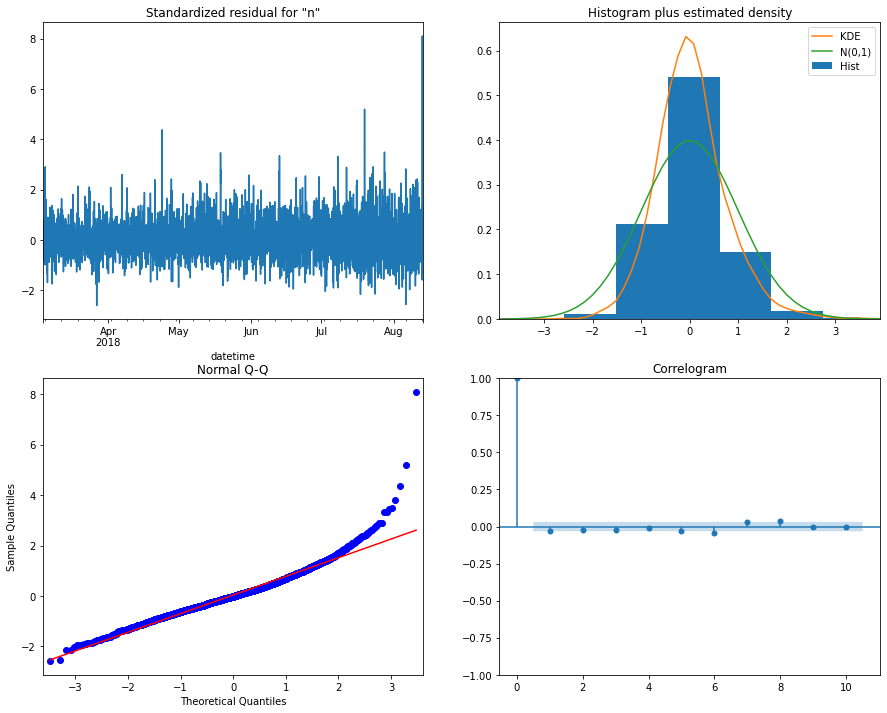

In [46]:
model_results.plot_diagnostics(figsize=(15, 12))
plt.show()

Остатки распределены квазинормально, корреляций на коррелограмме остатков не наблюдается.

Построим диаграмму рассеяния ошибок модели:

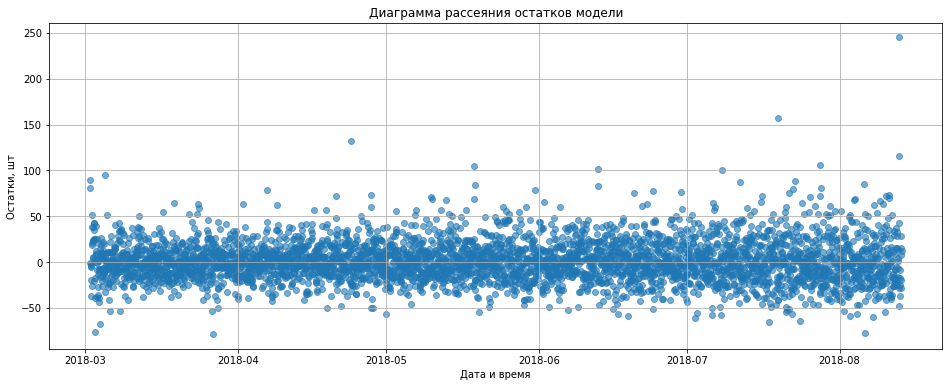

In [47]:
plt.figure(figsize=(16,6))
plt.scatter(x=target_train.index, y=model_results.resid, alpha=.6)
plt.title('Диаграмма рассеяния остатков модели')
plt.xlabel('Дата и время')
plt.ylabel('Остатки, шт');
plt.grid()

Условие постоянства дисперсии ошибки соблюдено - модель готова. 

Посчитаем *RMSE* на обучающей выборке:

In [48]:
mean_squared_error(model_results.get_prediction(start=train.index.min(), dynamic=False).predicted_mean, target_train) ** .5

22.601614739177975

Оценим визуально, как модель аппроксимировала обучающую выборку (возьмем период с начала августа):

In [49]:
sarima_approx = model_results.get_prediction(start=train.index.min(), dynamic=False)

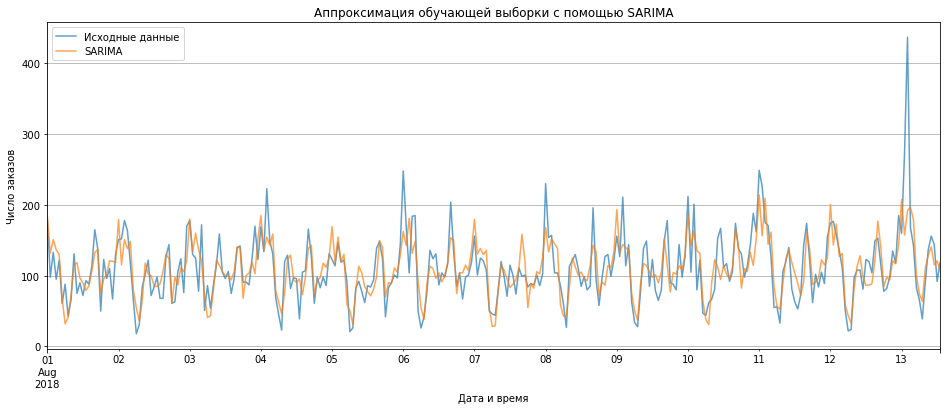

In [50]:
ax = target_train['2018-08':].plot(label='Исходные данные', figsize=(16, 6), alpha=.7)
sarima_approx.predicted_mean['2018-08':].plot(ax=ax, label='SARIMA', alpha=.7)
ax.set_title('Аппроксимация обучающей выборки с помощью SARIMA')
ax.set_xlabel('Дата и время')
ax.set_ylabel('Число заказов')
plt.grid()
plt.legend()
plt.show()

Аппроксимация выглядит достойно - модель учла сезонность, часто правильно предсказывает высоту и глубину пиков. Важно отметить, что пределы изменения гиперпараметров довольно узкие. Возможно, при расширении диапазона оптимитизации гиперпараметров модель получилась бы более качественной (однако даже в нашем случае она получилась довольно тяжеловесной). 

### Гребнеевая регрессия

Инициализурем модель гребнеевой регрессии:

In [71]:
ridge = Ridge()

Зададим пределы изменения гиперпараметра альфа:

In [72]:
parameters = {'alpha':np.logspace(-7,9,7)}

Произведем поиск по сетке с 5-ти кратной кросс-валидацией:

In [73]:
gsc_ridge = GridSearchCV(ridge, param_grid=parameters, 
                   scoring='neg_mean_absolute_error', 
                   cv=TimeSeriesSplit(n_splits=5).split(features_train))

In [74]:
%%time
gsc_ridge.fit(features_train, target_train)

Wall time: 77.1 ms


GridSearchCV(cv=<generator object TimeSeriesSplit.split at 0x000001B404A714A0>,
             estimator=Ridge(),
             param_grid={'alpha': array([1.00000000e-07, 4.64158883e-05, 2.15443469e-02, 1.00000000e+01,
       4.64158883e+03, 2.15443469e+06, 1.00000000e+09])},
             scoring='neg_mean_absolute_error')

Время обучения 77.1 мс., посчитаем *RMSE* на обучающей выборке:

In [75]:
mean_squared_error(gsc_ridge.predict(features_train), target_train) ** .5

30.58084305063462

Оценим визуально, как модель аппроксимировала обучающую выборку (возьмем период с начала августа):

In [56]:
ridge_approx = pd.DataFrame(data = gsc_ridge.predict(features_train), index=train.index, columns=['Ridge'])

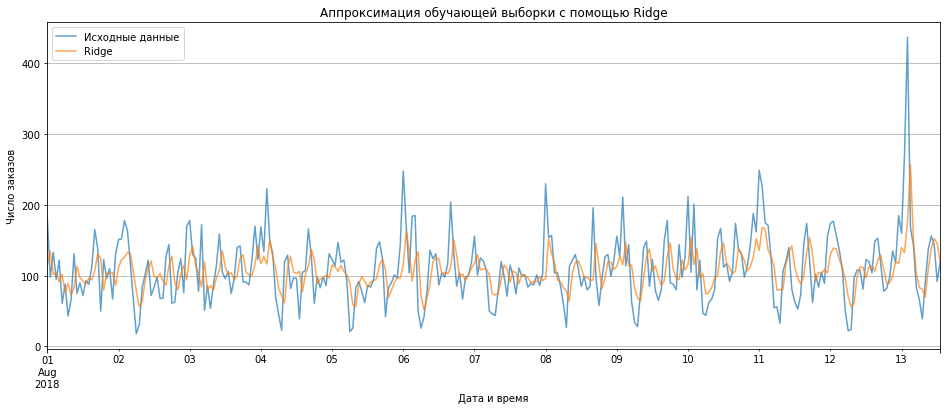

In [57]:
ax = target_train['2018-08':].plot(label='Исходные данные', figsize=(16, 6), alpha=.7)
ridge_approx['2018-08':].plot(ax=ax, label='Dynamic Forecast', alpha=.7)
ax.set_title('Аппроксимация обучающей выборки с помощью Ridge')
ax.set_xlabel('Дата и время')
ax.set_ylabel('Число заказов')
plt.grid()
plt.legend()
plt.show()

Аппроксимация также выглядит явно хуже - модель хуже (нежели *SARIMA*) предсказывает высоту и глубину пиков. Однако сезонность модель уловила неплохо. Стоит отметить, что в гребнеевой регрессии реализована кросс-валидация, а в *SARIMA* - нет.

### Градиентный бустинг LightGBM

Запишем словарь с параметрами:

In [58]:
param_lgb = {'objective':'regression',
             'metric': 'rmse',
             'max_depth': 2,
             'verbose': -1,
             'seed': SEED}

Обучим модель с 5-ти кратной кросс-валидацией:

In [59]:
number_folds = 5

Вычислим размер фолда:

In [60]:
k = int(np.floor(float(features_train.shape[0]) / number_folds))

In [61]:
%%time

scores_RMSE = []

for i in range(2, number_folds + 1):
    split = float(i-1)/i

    X = features_train[:(k*i)]
    y = target_train[:(k*i)]

    index = int(np.floor(X.shape[0] * split))
 
    train_data = lgb.Dataset(X[:index], 
                             y[:index],
                             categorical_feature=['is_weekend', 'is_holiday'], 
                             free_raw_data=False)
    valid_data = lgb.Dataset(X[(index + 1):], 
                             y[(index + 1):],
                             categorical_feature=['is_weekend', 'is_holiday'], 
                             free_raw_data=False)
      
    lightgb = lgb.train(param_lgb,
                       train_set=train_data,
                       valid_sets=valid_data,
                       num_boost_round=1000,
                       verbose_eval = False)
        
    scores_RMSE.append(mean_squared_error(y[(index + 1):], lightgb.predict(X[(index + 1):])) ** .5) 
print('Среднее RMSE:', np.mean(scores_RMSE))

Среднее RMSE: 27.13017060073605
Wall time: 388 ms


Время обучения 388 мс.

Оценим визуально, как модель аппроксимировала обучающую выборку (возьмем период с начала августа):

In [62]:
lightgb_approx = pd.DataFrame(data = lightgb.predict(features_train), index=train.index, columns=['LightGBM'])

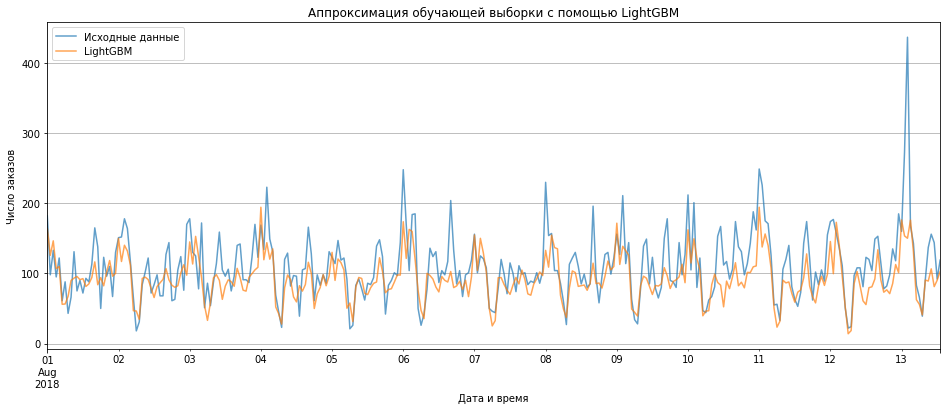

In [63]:
ax = target_train['2018-08':].plot(label='Исходные данные', figsize=(16, 6), alpha=.7)
lightgb_approx['2018-08':].plot(ax=ax, label='Dynamic Forecast', alpha=.7)
ax.set_title('Аппроксимация обучающей выборки с помощью LightGBM')
ax.set_xlabel('Дата и время')
ax.set_ylabel('Число заказов')
plt.grid()
plt.legend()
plt.show()

Аппроксимация с помощью градиентного бустинга выглядит немного лучше, чем у гребнеевой регрессии. Стоит отметить, что *LightGBM* работает "из коробки" без оптимитизации гиперпараметров.

## Тестирование

### SARIMA

Сделаем прогноз значений из отложенной выборки:

In [64]:
sarima_pred = model_results.get_forecast(steps=target_test.shape[0])

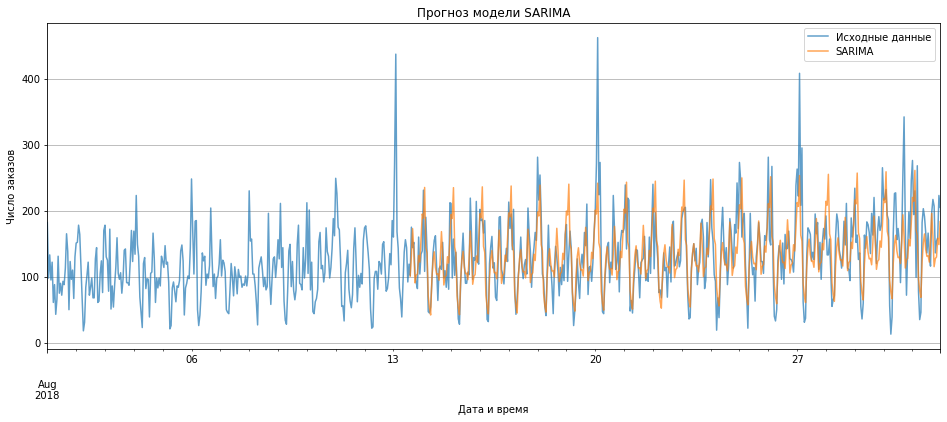

In [65]:
ax = df['num_orders']['2018-08':].plot(label='Исходные данные', figsize=(16, 6), alpha=.7)
sarima_pred.predicted_mean.plot(ax=ax, label='SARIMA', alpha=.7)
plt.grid()
ax.set_title('Прогноз модели SARIMA')
ax.set_xlabel('Дата и время')
ax.set_ylabel('Число заказов')
plt.legend()
plt.show()

Посчитаем *RMSE* на тестовой выборке:

In [66]:
mean_squared_error(sarima_pred.predicted_mean, target_test) ** .5

40.76041625699875

### Гребнеевая регрессия

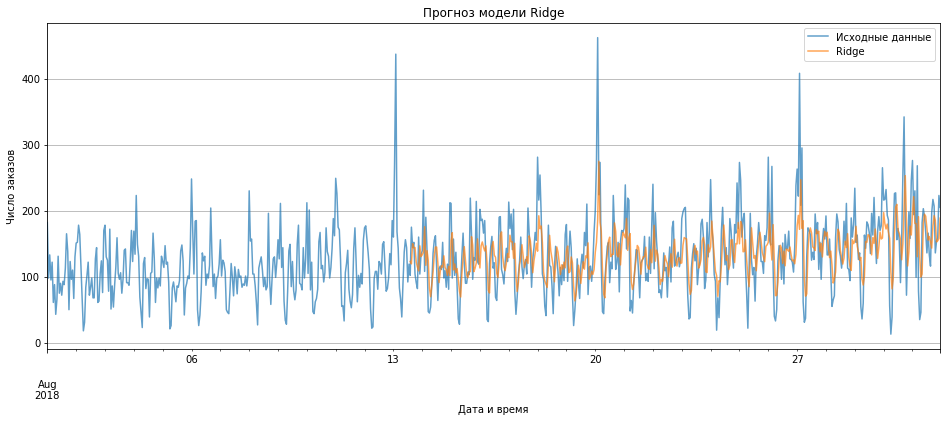

In [67]:
ax = df['num_orders']['2018-08':].plot(label='Исходные данные', figsize=(16, 6), alpha=.7)
pd.DataFrame(data=gsc_ridge.predict(features_test), index=test.index, columns=['Ridge']).plot(ax=ax, alpha=.7)
plt.grid()
ax.set_title('Прогноз модели Ridge')
ax.set_xlabel('Дата и время')
ax.set_ylabel('Число заказов')
plt.legend()
plt.show()

In [68]:
mean_squared_error(gsc_ridge.predict(features_test), target_test) ** .5

50.38727698265655

### Градиентный бустинг LightGBM

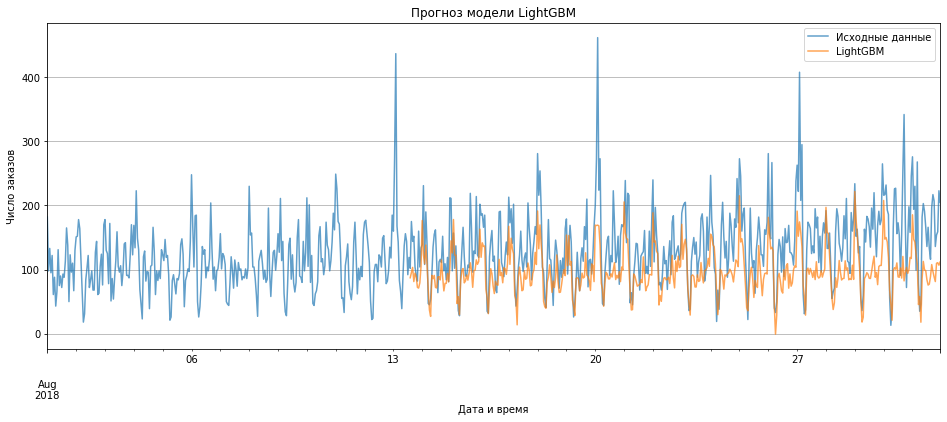

In [69]:
ax = df['num_orders']['2018-08':].plot(label='Исходные данные', figsize=(16, 6), alpha=.7)
pd.DataFrame(data=lightgb.predict(features_test), index=test.index, columns=['LightGBM']).plot(ax=ax, alpha=.7)
plt.grid()
ax.set_title('Прогноз модели LightGBM')
ax.set_xlabel('Дата и время')
ax.set_ylabel('Число заказов')
plt.legend()
plt.show()

In [76]:
mean_squared_error(lightgb.predict(features_test), target_test) ** .5

60.271786221588734

## Общий вывод

В рамках представленной работы данные были загружены, проведен первый взгляд на данные. Исходный датасет представляет собой временной ряд с 10 минутным таймфреймом. Пропусков, дубликатов не обнаружено. 

Исходный датасет был ресемплирован с агрегированием суммы числа заказов за час и проанализирован прежде всего визуально. В ходе анализа было выявлено, что ряд имеет нелинейный тренд и дневную аддитивную сезонность. Для того, чтобы удостоверится в предположениях ряд был декомпозирован с помощью библиотеки `statsmodels` и разложен на составляющие: тренд, сезонность, шум. Стоит отметить, что ряд возможно имеет мультисезонность (6-ти часовая мультипликарная). Исходя из этих наблюдений, было вынесено предположение, что ряд является нестационарным. 

Для проверки на стационарность был применен критерий Дики-Фуллера с предварительно установленным уровнем критической значимости в 5%. Значение *p-value* составляет 0.0289. Таким образом, нулевая гипотеза о нестационарности ряда была отвергнута в пользу альтернативной гипотезы: ряд стационарен. Однако, исходя из сезонности ряда назвать его таковым все таки нельзя (назовем его квазистационарным). 

После анализа было произведено извлечение признаков, таких как:

- Месяц;

- день;

- день недели;

- час дня;

- категориальный признак: выходной день (если это выходной день - 1, если нет - 0);

- категориальный признак: праздничный день (если это праздничный день - 1, если нет - 0);

- лаги временного ряда;

- скользящее среднее временного ряда.

При этом, величина смещения лагов была взята равным удвоенному периоду сезона - 48 часов, а окно для скользящего среднего ранвым одной неделе (168 часов) для сглаживания тренда. После извлечения признаков данные были разбиты на обучающую и отложенную выборку в соотношении 9:1 из которых были выделены целевой и остальные признаки.

Первая модель была основана на эконометрическом подходе - *SARIMA* (seasonality autoregression integrated mean average). Модель строилась на целевом признаке из обучающей выборки, параметры оптимитизировались с помощью поиска по сетке. 

Вторая модель - гребнеевая регрессия. При ее построении оптимитизация гиперпараметра альфа происходила также с помощью поиска по сетке с 5-ти кратной кросс-валидацией. 

Третья модель - градиентный бустинг *LightGBM*. При ее построении гиперпараметры не оптимитизировались (глубина дерева была принудительно ограничена значением 2, чтобы избеждать переобучения). При обучении модели использовалась также 5-ти кратная кросс-валидация.

Результаты обучения моделей представлены в таблице:

|Модель|*RMSE* на обучающей выборке, шт|*RMSE* на тесте, шт| Время оптимитизации гиперпараметров, сек. | Время обучения, сек.| Суммарное время, сек. |
|------|-------------------------------|-------------------|-------------------------------------------|---------------------|--|
|*SARIMA*| 22.601 | 40.760| 660 | 33.3 | 693.3
|*Ridge*| 30.580 | 50.387| 0.077 | - | 0.077
|*LightGBM*| 27.130 | 60.271| - | 0.388 | 0.388



Модель *SARIMA* оказалась лучшей по качеству предсказания как на тестовой, так и на обучающей выборке. Однако, данная модель крайне тяжеловесна. Стоит отметить, что качество предсказания, скорее всего, с помощью нее можно повысить если расширить сетку поиска гиперпараметров. Но это нелинейно увиличивает время оптимитизации. Также работать с такой моделью неудобно.

На втором месте по качеству, но первой по скорости оказалась модель гребнеевой регрессии (*ridge*). Скорость ее обучения превышает скорость обучения модели *SARIMA* более чем на четыре порядка. При этом качество моделей отличается не пропорционально разнице в сложности моделей (разница ~10 заказов) и с ней (гребнеевой регрессией) легко работать.

На последнем месте (с большим отрывом, ~20 заказов) оказалась модель градиентного бустинга *LightGBM*, можно предположить что это происходит из-за высокой выразительной способности градиентного бустинга - модель переобучается. Скорость обучения модели градиентного бустинга отстает от гребнеевой регрессии на порядок. Важно отметить, что *LightGBM* была построена "из коробки" без оптимитизации гиперпараметров.